# WeatherPy

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import seaborn as sns
import datetime
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [25]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each latitude, longitude combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

588

## Perform API Calls
#### Perform a weather check on each city using a series of successive API calls.
#### Include a print log of each city as it'sbeing processed (with the city number and city name).

In [15]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Build query URL
query_url = base_url + "&q=" + city
response = requests.get(query_url).json()

# Test the response
response
#print(query_url)

{'coord': {'lon': -70.92, 'lat': -53.15},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 53.33,
  'feels_like': 47.97,
  'temp_min': 53.01,
  'temp_max': 53.6,
  'pressure': 995,
  'humidity': 62},
 'visibility': 10000,
 'wind': {'speed': 5.82, 'deg': 360},
 'clouds': {'all': 75},
 'dt': 1580523974,
 'sys': {'type': 1,
  'id': 8487,
  'country': 'CL',
  'sunrise': 1580461872,
  'sunset': 1580517767},
 'timezone': -10800,
 'id': 3874787,
 'name': 'Punta Arenas',
 'cod': 200}

In [46]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

city_counter = 1
set_counter = 1
# Create the lists to hold relative data
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

# Create a query url for each city in the cities list to get json response
for i, city in enumerate(cities):
    
    # Group cities as sets of 50s
    if (i % 50 == 0 and i >= 50):
        set_counter += 1
        city_counter = 1
         
    # Create API url for each city
    query_url = base_url +"&q=" + city
    
    # Get json respose for each city
    response = requests.get(query_url).json()
    
    # Print the results 
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    time.sleep(1)  
    # Increase city counter
    city_counter += 1
    
    # Add the values to the lists
    try:     
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    except:
        print("City not found. Skipping...")
        pass
       
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')
 

------------------------
Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | outlook
Processing Record 2 of Set 1 | saint george
Processing Record 3 of Set 1 | celestun
Processing Record 4 of Set 1 | nuuk
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | opuwo
Processing Record 9 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | aksehir
Processing Record 12 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 13 of Set 1 | trairi
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | tautira
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | coquimbo
Processing Record 21 of Set 1 

City not found. Skipping...
Processing Record 37 of Set 4 | kawhia
Processing Record 38 of Set 4 | nioro
Processing Record 39 of Set 4 | gazanjyk
Processing Record 40 of Set 4 | christchurch
Processing Record 41 of Set 4 | kununurra
Processing Record 42 of Set 4 | ranavav
Processing Record 43 of Set 4 | longyearbyen
Processing Record 44 of Set 4 | luderitz
Processing Record 45 of Set 4 | cockburn harbour
City not found. Skipping...
Processing Record 46 of Set 4 | natchitoches
Processing Record 47 of Set 4 | agadez
Processing Record 48 of Set 4 | umm lajj
Processing Record 49 of Set 4 | orcopampa
Processing Record 50 of Set 4 | ribeira grande
Processing Record 1 of Set 5 | puerto rondon
Processing Record 2 of Set 5 | kalianget
Processing Record 3 of Set 5 | lolua
City not found. Skipping...
Processing Record 4 of Set 5 | manokwari
Processing Record 5 of Set 5 | taywarah
Processing Record 6 of Set 5 | rawannawi
City not found. Skipping...
Processing Record 7 of Set 5 | chuy
Processing Re

Processing Record 29 of Set 8 | waddan
Processing Record 30 of Set 8 | kuah
Processing Record 31 of Set 8 | atar
Processing Record 32 of Set 8 | rocha
Processing Record 33 of Set 8 | omsukchan
Processing Record 34 of Set 8 | fortuna
Processing Record 35 of Set 8 | tomatlan
Processing Record 36 of Set 8 | black river
Processing Record 37 of Set 8 | nantucket
Processing Record 38 of Set 8 | labuan
Processing Record 39 of Set 8 | guerrero negro
Processing Record 40 of Set 8 | najran
Processing Record 41 of Set 8 | ceres
Processing Record 42 of Set 8 | poum
Processing Record 43 of Set 8 | bokspits
City not found. Skipping...
Processing Record 44 of Set 8 | bara
Processing Record 45 of Set 8 | asosa
Processing Record 46 of Set 8 | oktyabrskoye
Processing Record 47 of Set 8 | nenjiang
Processing Record 48 of Set 8 | narsaq
Processing Record 49 of Set 8 | okha
Processing Record 50 of Set 8 | calabozo
Processing Record 1 of Set 9 | yulara
Processing Record 2 of Set 9 | skibbereen
Processing Re

Processing Record 17 of Set 12 | yomitan
City not found. Skipping...
Processing Record 18 of Set 12 | majene
Processing Record 19 of Set 12 | tocopilla
Processing Record 20 of Set 12 | praya
Processing Record 21 of Set 12 | vila franca do campo
Processing Record 22 of Set 12 | lekoni
Processing Record 23 of Set 12 | dingle
Processing Record 24 of Set 12 | valle de allende
Processing Record 25 of Set 12 | harper
Processing Record 26 of Set 12 | nurota
Processing Record 27 of Set 12 | igarka
Processing Record 28 of Set 12 | ilebo
Processing Record 29 of Set 12 | yumen
Processing Record 30 of Set 12 | salto
Processing Record 31 of Set 12 | comodoro rivadavia
Processing Record 32 of Set 12 | sai buri
Processing Record 33 of Set 12 | hun
Processing Record 34 of Set 12 | kamaishi
Processing Record 35 of Set 12 | vao
Processing Record 36 of Set 12 | tazovskiy
Processing Record 37 of Set 12 | kidal
Processing Record 38 of Set 12 | nadadores
-------------------------
Data Retrieval Complete
---

In [27]:
# Create dictionary of data to convert to dataframe
weather_dictionary = {
     "City": cities_list,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Latitude": lat,
     "Longitude": lng,
     "Max Temperature": max_temp,
     "Wind Speed": wind_speed    
 }
# Create the data frame and count variables for each columns
weather_data_df = pd.DataFrame(weather_dictionary)
weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Outlook,99,CA,1580529178,78,51.50,-107.05,24.28,4.29
1,Saint George,1,US,1580528790,38,37.10,-113.58,46.40,1.41
2,Celestun,0,MX,1580529179,91,20.87,-90.40,74.53,20.04
3,Nuuk,100,GL,1580529106,78,64.18,-51.72,12.20,10.29
4,Hilo,90,US,1580529180,69,19.73,-155.09,75.20,4.70


In [28]:
weather_data_df.count()


City               546
Cloudiness         546
Country            546
Date               546
Humidity           546
Latitude           546
Longitude          546
Max Temperature    546
Wind Speed         546
dtype: int64

In [29]:
# Save the dataframe into a csv file
weather_data_df.to_csv("output_file/cities.csv", float_format=None, header=True, 
                       index=False, index_label=None, mode='w', encoding=None, )

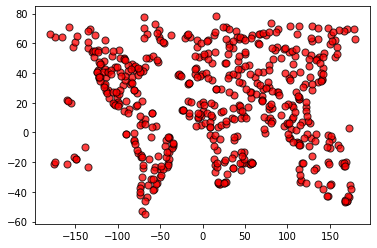

In [30]:
# I run by mistacke Longitude vs Latitude, but this made such a nice scatter plot! I will just leave it here!:)
# Also,it helps to see the representation of cities around the globe, covering all continents.

# Longitude vs Latitude Plot   
plt.scatter(weather_data_df["Longitude"],weather_data_df["Latitude"],marker="o",facecolors="red",edgecolors="black",s=50,alpha=0.75)

In [31]:
#make a function for all scatter plots

def scatter_maker(y_axis, dot_color, vs_title):
    
    #make the label font bigger
    sns.set(font_scale=1.5)
    
    #plot
    fig = sns.lmplot(x='Latitude', y=y_axis, data=weather_data_df, fit_reg=False, 
           scatter_kws={'alpha':0.9, 'color':dot_color}, size=8, aspect=1.25)
    
    # set the date of today
    ts = time.gmtime(weather_data_df['Date'][0])
    datestr = time.strftime("%x",ts)
    
    #set the title
    plt.title(f'City Latitude vs. {vs_title} ({datestr})',  fontsize=20)

    #save as a png
    fig.savefig(f'{vs_title}.png')
    plt.show()

/Users/bolboceanunicolai/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


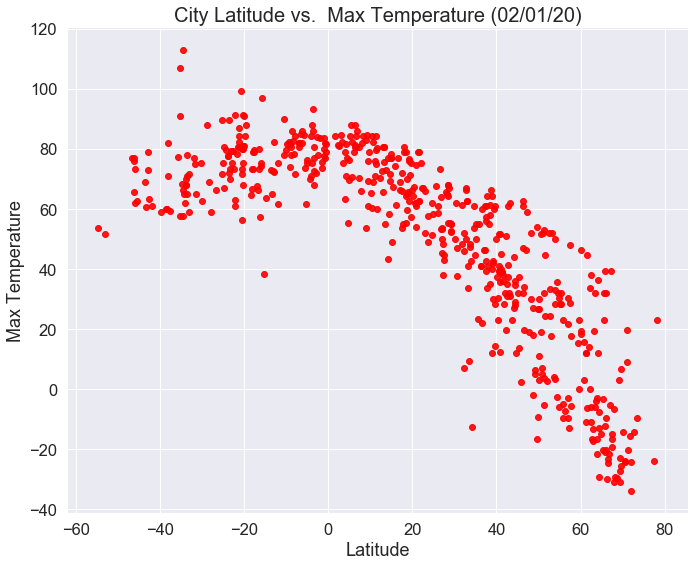

In [32]:
#Latitude vs. Temperature Plot
scatter_maker('Max Temperature', 'red',' Max Temperature')

#### As Latitude moves away from equator, temperature also decreases. Most high temperatures are around equator and tropics.

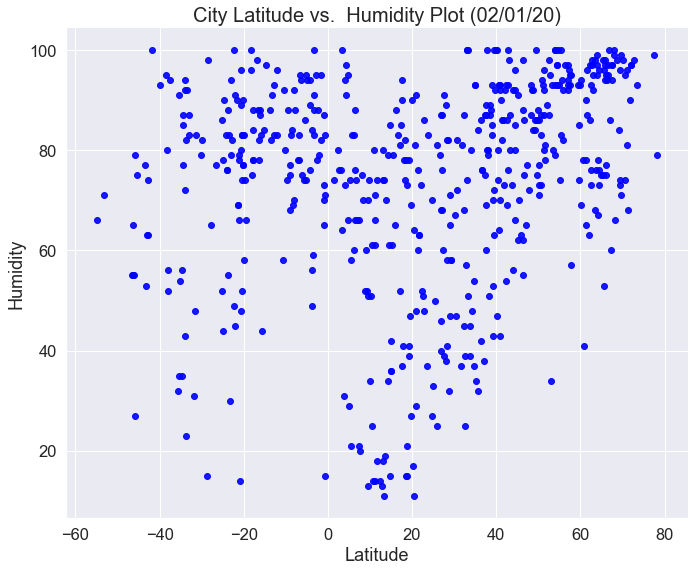

In [33]:
#Latitude vs. Humidity
scatter_maker('Humidity', 'blue',' Humidity Plot')

#### We can't see any specific relationship between Latitude and Humidity. 

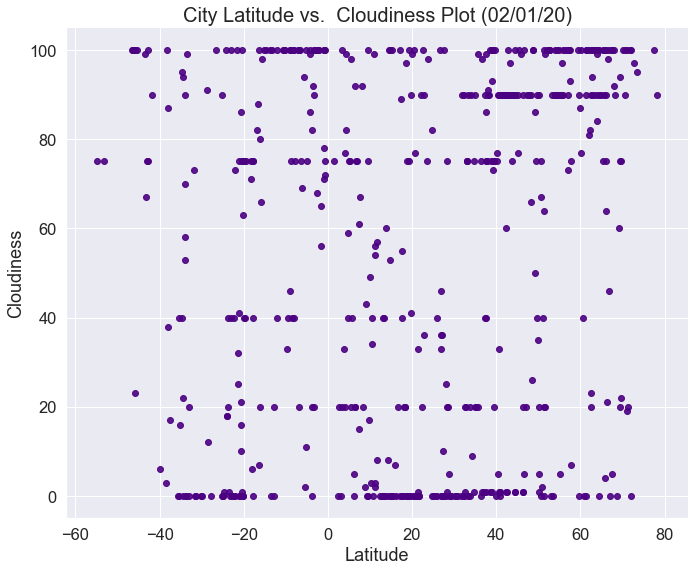

In [34]:
#Latitude vs. Cloudiness
scatter_maker('Cloudiness', 'indigo',' Cloudiness Plot')

#### Despite the fact that Latitude and Cloudiness doesn't show any semnificatif corroletion, it is interesting to see this relationship and the group of dots aligned along meridians.

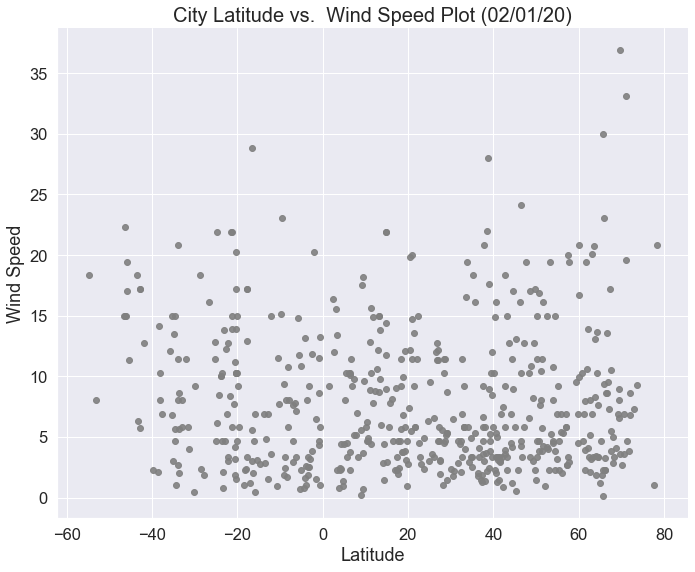

In [35]:
#Latitude vs. Wind Speed
scatter_maker('Wind Speed', 'grey',' Wind Speed Plot')

#### We can notice a slightly biger concentration of dots in the Northern Emisphere, wich means moving North from equator will be more possible to have windy weather.

# Linear Regression

In [36]:
# Separating Northert and Southern Hemisphere
northern = weather_data_df.loc[weather_data_df["Latitude"] >= 0.0]
northern.reset_index(inplace=True)

southern = weather_data_df.loc[weather_data_df["Latitude"] < 0.0]
southern.reset_index(inplace=True)

In [37]:
def regression_maker(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    #plt.savefig(f"output_data/fig{ifig}.png")
    plt.savefig(f'{ifig}.png')
    plt.show()
 

The r-squared is: -0.8665682391416348


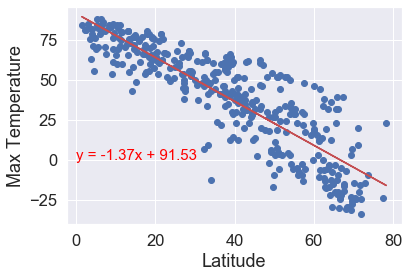

In [38]:
# Northern Hemisphere: Temperature (F) vs. Latitude 

xlbl = "Latitude"
ylbl = "Max Temperature"
lblpos = (0,0)
regression_maker(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,1)

#### The correlation between Temperature and Latitude in the Northern Hemisphere is -0.85. This means we have a significan negative relationship. More we move north from equator, temperatures will decrease as well. 

The r-squared is: 0.3428199535968303


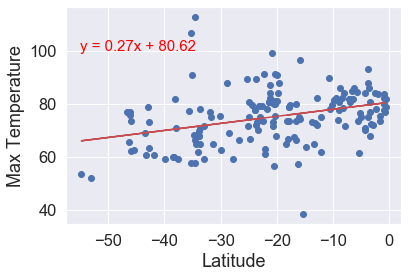

In [39]:
# Southern Hemisphere: Temperature (F) vs. Latitude
xlbl = "Latitude"
ylbl = "Max Temperature"
lblpos = (-55,100)
regression_maker(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,2)

#### The correlation between Temperature and Latitude in the Southern Hemisphere is 0.33. Generally, the regrassion values are between -1 and 1. A r-squared close to 1 shows a strong positive correlation(or negative correlation if is close to -1). Our exemple dosen't show any significant correlation between Latitude and Temperature in the Southern hemsphere.

The r-squared is: 0.5024426985116436


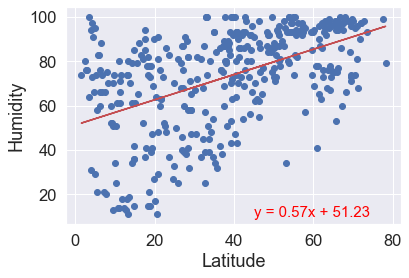

In [40]:
# Northern Hemisphere: Humidity (%) vs. Latitude
xlbl = "Latitude"
ylbl = "Humidity"
lblpos = (45,10)
regression_maker(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,3)

#### The correlation between Humidity and Latitude in the Northern Hemisphere is 0.32. This relationship dosen't show any significant correlation.

The r-squared is: 0.26159270792467026


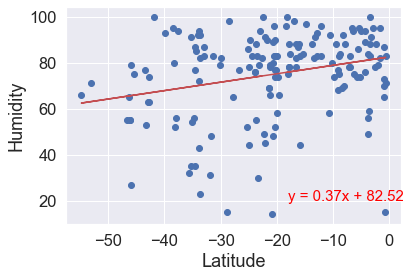

In [41]:
# Southern Hemisphere: Humidity (%) vs. Latitude
xlbl = "Latitude"
ylbl = "Humidity"
lblpos = (-18,20)
regression_maker(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,4)

#### The correlation between Humidity and Latitude in the Southern Hemisphere is 0.28. Almost a non-existen correlation.This relationship dosen't show any significant correlation.

The r-squared is: 0.3698827032857535


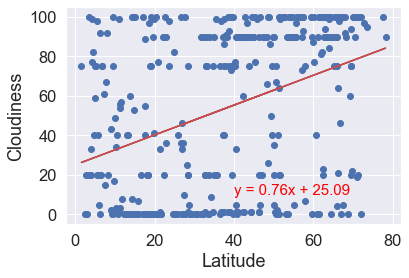

In [42]:
# Northern Hemisphere: Cloudiness (%) vs. Latitude
xlbl = "Latitude"
ylbl = "Cloudiness"
lblpos = (40,10)
regression_maker(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,5)

#### The correlation between Cloudiness and Latitude in the Northern Hemisphere is 0.34.  This relationship dosen't show any significant correlation. Clouds are uniform represented all around Northern Hemisphere.

The r-squared is: 0.16504912309041553


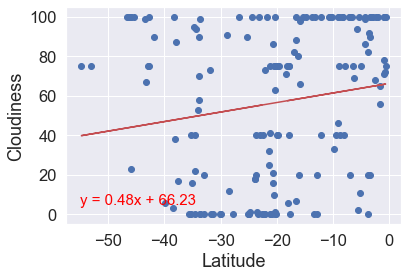

In [43]:
# Southern Hemisphere: Cloudiness (%) vs. Latitude
xlbl = "Latitude"
ylbl = "Cloudiness"
lblpos = (-55,5)
regression_maker(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,6)

#### The correlation between Cloudiness and Latitude in the Southern Hemisphere is 0.12. This relationship dosen't show any significant correlation. Clouds are uniform represented or missing around Southern Hemisphere

The r-squared is: 0.061849784645886134


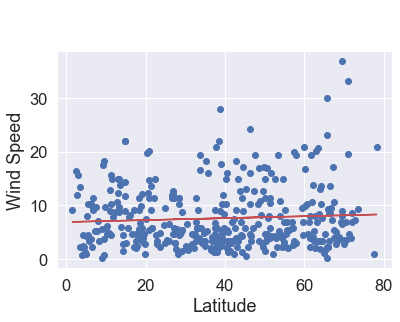

In [44]:
# Northern Hemisphere: Wind Speed (mph) vs. Latitude
xlbl = "Latitude"
ylbl = "Wind Speed"
lblpos = (0,45)
regression_maker(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,7)

#### The correlation between Wind Speed and Latitude in the Northern Hemisphere is 0.11. Almost a non-existed correlation. 

The r-squared is: -0.2963078159325432


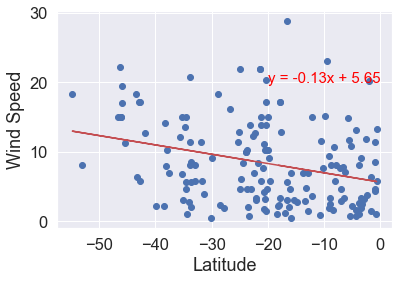

In [45]:
# Southern Hemisphere: Wind Speed (mph) vs. Latitude
xlbl = "Latitude"
ylbl = "Wind Speed"
lblpos = (-20,20)
regression_maker(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,8)

#### The correlation between Wind Speed and Latitude in the Northern Hemisphere is -0.18. Almost a non-existed  negative correlation. More we move south from equator, more powerful winds will have.

#Observations
1. As expected, temperature correlates well with the latitude. As latitude moves away from equator, temperature also decreases
2. It seems that there is no correlation between humidity and latitude
3. Even though there is very little correlation between wind speed and latitude, wind speed tends to be  higher near arctic and antarctic